<a href="https://colab.research.google.com/github/danbikiki/machine-learning/blob/master/200819_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#구글 드라이브+코랩 연결
-작업환경:구글 코랩
-데이터: 구글 드라이브
###연동

In [2]:
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%pwd

'/content'

In [4]:
%ls

drive/  sample_data/


In [5]:
%cd drive/'My Drive'/'Colab Notebooks'/'ml_project'

/content/drive/My Drive/Colab Notebooks/ml_project


In [6]:
%ls

gender_submission.csv  test.csv  train.csv


In [7]:
import pandas as pd
from pandas.io import gbq

# import submission file in Google Drive
train = pd.read_csv('train.csv')
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
train.to_gbq(destination_table='titanic_classification.train', 
                  project_id='nomadic-poet-286903', 
                  if_exists='replace')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=fclFGI8YDEH9kh4yvOWr53JUtf9IL2&prompt=consent&access_type=offline
Enter the authorization code: 4/3AGa-Q0Vxs3NNZObYSilJHCsaIo3ZMjIC6YAkNjg7UCTVMndq4vJNPw


1it [00:03,  3.19s/it]


In [9]:
train.to_gbq(destination_table='titanic_classification.test', 
                  project_id='nomadic-poet-286903', 
                  if_exists='replace')

1it [00:03,  3.23s/it]


In [11]:
train.to_gbq(destination_table='titanic_classification.gender_submission', 
                  project_id='nomadic-poet-286903', 
                  if_exists='replace')

1it [00:03,  3.56s/it]


#kaggle에서 api로 다운받기

In [12]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# kaggle.json을 아래 폴더로 옮긴 뒤, file을 사용할 수 있도록 권한을 부여한다. 
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

#이러고 아래에 파일 선택 나오면 바탕화면에 있는 kaggle.json 갖다 붙이면 됨!

Saving kaggle.json to kaggle.json
uploaded file "kaggle.json" with length 65 bytes


In [13]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        162           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        374           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2781           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      20418           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       5159           False  
connectx                                       2030-01-01 00:00:00  Getting Started  Knowledge        853           False  
nlp-gett

In [14]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

403 - Forbidden


In [15]:
!ls

gender_submission.csv  test.csv  train.csv


In [16]:
!kaggle competitions download -c titanic

403 - Forbidden


In [17]:
!ls

gender_submission.csv  test.csv  train.csv


#데이터 피처공학
###(1)주요 패키지 불러오기


In [47]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [63]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [64]:
# 구글 인증 라이브러리
from google.colab import auth

# 빅쿼리 관련 라이브러리
from google.cloud import bigquery
from tabulate import tabulate
import pandas as pd

In [68]:
gcloud config set project TITANIC

SyntaxError: ignored

In [69]:
from google.cloud import bigquery
from tabulate import tabulate
import pandas as pd

project_id = 'nomadic-poet-286903'
client = bigquery.Client(project=project_id)

df_train = client.query('''
  SELECT 
      * 
  FROM `nomadic-poet-286903.titanic_classification.train`
  ''').to_dataframe()

df_train.shape

(891, 12)

In [71]:
df_test = client.query('''
  SELECT 
      * 
  FROM `nomadic-poet-286903.titanic_classification.test`
  ''').to_dataframe()

df_test.shape

(891, 12)

In [72]:
pd.options.display.max_columns = None 
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,None,S
1,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
2,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,None,S
3,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,None,S
4,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,None,S


###(3)결측 데이터 확인

In [73]:
# data set의 Percent 구하는 함수를 짜보자. 
def check_fill_na(data):
  new_df = data.copy()
  new_df_na = (new_df.isnull().sum() / len(new_df)) * 100
  new_df_na.sort_values(ascending=False).reset_index(drop=True)
  new_df_na = new_df_na.drop(new_df_na[new_df_na == 0].index).sort_values(ascending=False)
  return new_df_na

check_fill_na(df_train)

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64

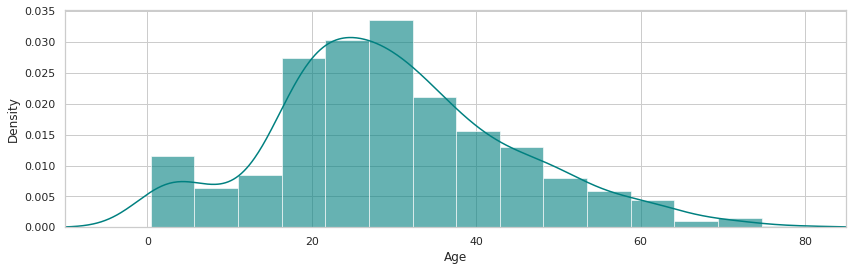

In [74]:
ax = df_train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df_train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [46]:
train = pd.read_csv('ml_project/train.csv')
test = pd.read_csv('data/test.csv')
print("data import is done")

FileNotFoundError: ignored